# PCA using Numpy

In [1]:
from numpy import array
from numpy import mean
from numpy import cov
from numpy.linalg import eig
import matplotlib.pyplot as plt
# define a matrix
A = array([[1, 2], [3, 4], [5, 6]])
print(A)

# Plotting the values 
fig, ax = plt.subplots()

for i in A:
    ax.scatter(i[0], i[1])
plt.show()


# calculate the mean of each column
M = mean(A.T, axis=1)
print(M)
# center columns by subtracting column means
C = A - M
print(C)
# calculate covariance matrix of centered matrix
V = cov(C.T)
print("V",V)
# eigendecomposition of covariance matrix
values, vectors = eig(V)
print(vectors)
print("value",values)
# project data
P = vectors.T.dot(C.T)

print(P.T)

[[1 2]
 [3 4]
 [5 6]]


<Figure size 640x480 with 1 Axes>

[3. 4.]
[[-2. -2.]
 [ 0.  0.]
 [ 2.  2.]]
V [[4. 4.]
 [4. 4.]]
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
value [8. 0.]
[[-2.82842712  0.        ]
 [ 0.          0.        ]
 [ 2.82842712  0.        ]]


# PCA using Sikit Learn

In [2]:
# Principal Component Analysis
from numpy import array
from sklearn.decomposition import PCA
# define a matrix
A = array([[1, 2], [3, 4], [5, 6]])
print("Input Matrix :\n", A)
print("\nShape of A ",A.shape )
# create the PCA instance
pca = PCA(2)
# fit on data
pca.fit(A)
# access values and vectors
print("\n Shape of the covarint matrix, ", pca.components_)
print("\nShape of vector ", pca.components_.shape)
print(pca.explained_variance_)
# transform data
B = pca.transform(A)
print(B)

Input Matrix :
 [[1 2]
 [3 4]
 [5 6]]

Shape of A  (3, 2)

 Shape of the covarint matrix,  [[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]

Shape of vector  (2, 2)
[8. 0.]
[[-2.82842712e+00 -2.22044605e-16]
 [ 0.00000000e+00  0.00000000e+00]
 [ 2.82842712e+00  2.22044605e-16]]


# Practical Implementation

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
%matplotlib inline

In [4]:
import pandas as pd
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# load dataset into Pandas DataFrame
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])
print(df.head())

   sepal length  sepal width  petal length  petal width       target
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


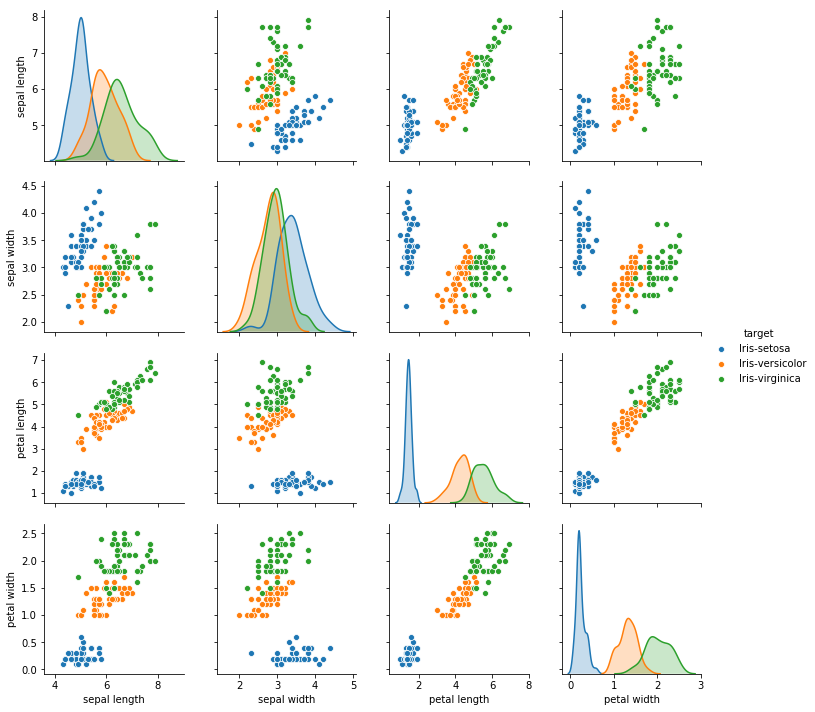

In [5]:
sns.pairplot(df, hue="target")
plt.show()

In [6]:
# Data mapping
target_dict= {0: 'Iris-setosa', 
              1: 'Iris-versicolor',
              2: 'Iris-virginica',
             -1: 'Others'}
def category_val (text):
    if text == 'Iris-setosa':
        return 0
    elif text == 'Iris-versicolor':
        return 1
    elif text == 'Iris-virginica':
        return 2
    else:
        return -1 

features = ['sepal length','sepal width','petal length','petal width']

df['target_val']= df['target'].apply(lambda x: category_val(x))

X=df.loc[:,features]    # Features
y=df.loc[:]['target_val']
# print(X.iloc[:1])
# print(y)


## Standardise the feature set
scaler = StandardScaler()
X = scaler.fit_transform(X)
# print(X[0])

pca = PCA(2)                   #n_componenet = 2 two fetaures are computed out of 4 
principalcomp=pca.fit_transform(X)
print(X.shape)
print("\nCovarint matrix,\n", pca.components_)
print("\nShape of vector \n", pca.components_.shape)
print(pca.explained_variance_)

principaldf=pd.DataFrame( data = principalcomp,
                        columns = ['PC1', 'PC2'])

final_df = pd.concat([principaldf, y], axis=1)
print("\n",final_df.head())


(150, 4)

Covarint matrix,
 [[ 0.52237162 -0.26335492  0.58125401  0.56561105]
 [ 0.37231836  0.92555649  0.02109478  0.06541577]]

Shape of vector 
 (2, 4)
[2.93035378 0.92740362]

         PC1       PC2  target_val
0 -2.264542  0.505704           0
1 -2.086426 -0.655405           0
2 -2.367950 -0.318477           0
3 -2.304197 -0.575368           0
4 -2.388777  0.674767           0


# Visualisation of the data

c:\users\nsingh1\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


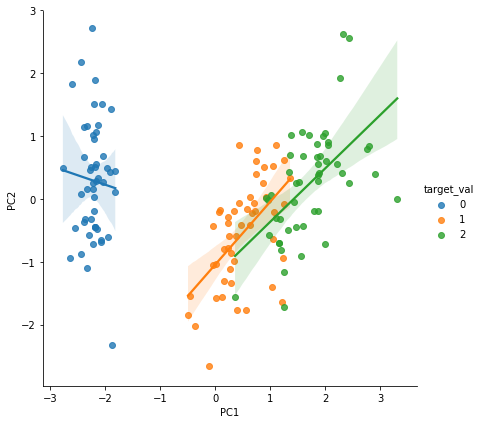

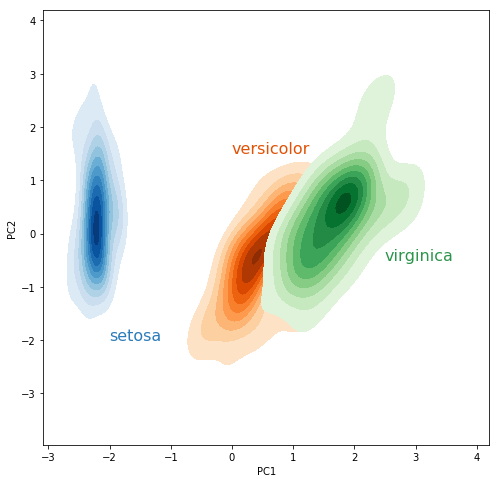

In [7]:
sns.lmplot(x= "PC1",y= "PC2",hue = 'target_val', data = final_df , height=6 , truncate=True)
plt.show()


f, ax = plt.subplots(figsize=(8, 8))

ax = sns.kdeplot(final_df[final_df["target_val"]==0]["PC1"], final_df[final_df["target_val"]==0]["PC2"], 
                 cmap="Blues", shade=True, shade_lowest=False)
ax = sns.kdeplot(final_df[final_df["target_val"]==1]["PC1"], final_df[final_df["target_val"]==1]["PC2"], 
                 cmap="Oranges", shade=True, shade_lowest=False)
ax = sns.kdeplot(final_df[final_df["target_val"]==2]["PC1"], final_df[final_df["target_val"]==2]["PC2"], 
                 cmap="Greens", shade=True, shade_lowest=False)


green = sns.color_palette("Greens")[-2]
blue = sns.color_palette("Blues")[-2]
orange = sns.color_palette("Oranges")[-2]

ax.text(-2, -2, "setosa", size=16, color=blue)
ax.text(0, 1.5, "versicolor", size=16, color=orange)
ax.text(2.5, -0.5, "virginica", size=16, color=green)
plt.show()

## Explained Variance

The explained variance tells you how much information (variance) can be attributed to each of the principal components. This is important as while you can convert 4 dimensional space to 2 dimensional space, you lose some of the variance (information) when you do this. By using the attribute **explained_variance_ratio_**, you can see that 

- **the first principal component contains 72.77% of the variance** and 
- **the second principal component contains 23.03% of the variance**. 

### Together, the two components contain 95.80% of the information.

In [8]:
print(pca.explained_variance_ratio_)

print("Total Feature-set", pca.explained_variance_ratio_[0] + pca.explained_variance_ratio_[1]) 

[0.72770452 0.23030523]
Total Feature-set 0.9580097536148199


## Fitting Logistic model

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(principalcomp, y, random_state = 101, test_size=0.3)
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 101)

log= LogisticRegression()
log.fit(X_train, y_train)
pred = log.predict(X_test)
print("Score of model :",log.score(X_test, y_test))

# confusion_matrix(y_test,pred )


Score of model : 0.8888888888888888
